## <span style = 'color:pink'> 20190220_WED_THURS_정해준 </span>

In [1]:
#데이터 행렬 연산 패키지
import numpy as np
#데이터 구성 패키지
import pandas as pd
#시각화 패키지
import seaborn as sns
import matplotlib
#데이터 시각화 패키지
import matplotlib.pyplot as plt
#통계분석 패키지
import scipy.stats as stats
#선형 모델 패키지
import statsmodels.api as sm
#회귀분석 패키지
from statsmodels.formula.api import ols
#평가함수 패키지
from statsmodels.tools.eval_measures import rmse
#주피터사용시 그래프 자동 출력 옵션
#다중공선성 패키지 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor
#sklearn 선형회귀 모형 -> 변수 선택법을 위함
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
#데이터 scale
from sklearn.preprocessing import scale


from sklearn import metrics


# 데이터 분할(train, test 데이터 7:3으로 - sklearn의 train_set_split)
from sklearn.model_selection import train_test_split
import os
#sklearn.tree의 Decision Tree classifier:분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
#sklearn.tree의 export_graphviz: graphviz패키지가 사용할수 있는.dot 확장자 파일로저장
from sklearn.tree import export_graphviz
#graphviz import:의사결정 나무 모델 시각화 .dot확장자 파일 불러오는 패키지
import graphviz


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC




import matplotlib.pyplot as plt # 그래프 출력시
import matplotlib as mpl   #그래프 옵션
#그래프 시각화 옵션
%matplotlib inline

#그래프 한글 설정
mpl.rc('font',family = 'NanumBarunGothic')

#그래프의 한글을 더욱 선명하게 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#그래프에서 음수값이 깨질때
mpl.rc("axes",unicode_minus=False)

#100개까지 컬럼 보기
pd.options.display.max_columns = 100

#pandas describe 생략되는 것 표시
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

#Data Base Connection
import sqlite3

import warnings
warnings.filterwarnings('ignore')

## DATA LOADING

In [2]:
b_d = pd.read_csv("/home/pirl/Downloads/data/data/rental_data/rental_member_data_buisness.csv")
p_d = pd.read_csv("/home/pirl/Downloads/data/data/rental_data/rental_member_data_personal.csv")
etc_d = pd.read_csv("/home/pirl/Downloads/data/data/rental_data/rental_sales_data.csv")

## Buisness (Data Set_1)

In [3]:
b_d.head()
print(b_d.columns)
b_d.info()
#print(b_d.isnull().sum())
#b_d['고객ID'].value_counts() > 1

Index(['고객ID', '고객유형', '생년', '생월', '거주지', '시', '구군', '남여구분'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 8 columns):
고객ID    3590 non-null int64
고객유형    3590 non-null object
생년      1811 non-null float64
생월      1811 non-null float64
거주지     3590 non-null object
시       3589 non-null object
구군      3590 non-null object
남여구분    3590 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 224.5+ KB


#### 결측된 ID존재하지 않음

## Personal (Data Set_2)

In [4]:
#p_d.head()
#print(p_d.columns)
p_d.info()
#p_d.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40046 entries, 0 to 40045
Data columns (total 8 columns):
고객ID    40046 non-null int64
고객유형    40046 non-null object
생년      36245 non-null float64
생월      36245 non-null float64
거주지     40045 non-null object
시       40046 non-null object
구군      40046 non-null object
남여구분    40046 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 2.4+ MB


#### Business와 Personal은 합치겠다.

## BUSINESS & PERSONAL (Data Set 1 + Data Set 2)

In [5]:
b_p = b_d.append(p_d)
b_p = b_p.reset_index(drop=True)
b_p.head(3)

,고객ID,고객유형,생년,생월,거주지,시,구군,남여구분
0,25702131,사업자,NaN,NaN,경기도,경기도,화성시,여자
1,25742841,사업자,1964.0,8.0,경기도,경기도,가평군,여자
2,25742683,사업자,1973.0,12.0,서울특별시,서울특별시,강남구,여자


In [6]:
b_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43636 entries, 0 to 43635
Data columns (total 8 columns):
고객ID    43636 non-null int64
고객유형    43636 non-null object
생년      38056 non-null float64
생월      38056 non-null float64
거주지     43635 non-null object
시       43635 non-null object
구군      43636 non-null object
남여구분    43636 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 2.7+ MB


#### 생년, 생월, 거주지, 시에서 결측치가 존재한다. 

In [7]:
b_p[ b_p[['거주지']].isnull().any(axis=1) | b_p[['시']].isnull().any(axis=1)]

,고객ID,고객유형,생년,생월,거주지,시,구군,남여구분
11,25742697,사업자,1979.0,5.0,경기도,NaN,광주시,여자
3815,66758696,개인,1988.0,5.0,NaN,광주광역시,북구,여자


#### 고객ID 25742697은 구군에 시가들어가 있는데, 시도 광주시로 채우겠다. 또한 ID 66758696은 거주지가 비어있는데, 광주광역시는 전라남도로 채우겠다.

In [8]:
b_p.loc[11,'시'] = '광주시'
b_p.loc[3815,'거주지'] = '전라남도'

### 생년월일

#### 이상치가 존재한다. 오타로 보인다.

#### 이상치가 2개 존재한다. 195.0은 1950년으로 197.0은 1970으로 대체하겠다.

In [9]:
b_p[b_p['생년'] <= 1900]

,고객ID,고객유형,생년,생월,거주지,시,구군,남여구분
3639,66758888,개인,195.0,3.0,경기도,경기도,고양시 덕양구,여자
3658,66643114,개인,197.0,1.0,서울특별시,서울특별시,관악구,여자


In [10]:
b_p.loc[(b_p['생년'] == 195.0)] = 1950

In [11]:
b_p.loc[(b_p['생년'] == 197.0)] = 1970

In [12]:
print(b_p[b_p[['생년']].isnull().any(axis=1)].count())
b_p[b_p[['생년']].isnull().any(axis=1)  &  b_p[['생월']].isnull().any(axis=1)].count() 
#b_p[b_p[['생월']].isnull().any(axis=1),'생월']

고객ID    5580
고객유형    5580
생년      0   
생월      0   
거주지     5580
시       5580
구군      5580
남여구분    5580
dtype: int64


고객ID    5580
고객유형    5580
생년      0   
생월      0   
거주지     5580
시       5580
구군      5580
남여구분    5580
dtype: int64

#### 생년이 없는 고객은 생월도 존재 하지 않는다. 일단 0(결측)으로 처리하겠다.

In [13]:
b_p.loc[b_p[['생월']].isnull().any(axis=1),'생월'] = 0

In [14]:
b_p.loc[b_p[['생년']].isnull().any(axis=1),'생년'] = 0

## 파생변수 (나이)

In [15]:
b_p.loc[((b_p['생년'] >= 1990) & (b_p['생년'] >= 1999)), '나이'] = 20
b_p.loc[((b_p['생년'] >= 1980) & (b_p['생년'] >= 1989)), '나이'] = 30
b_p.loc[((b_p['생년'] >= 1970) & (b_p['생년'] >= 1979)), '나이'] = 40
b_p.loc[((b_p['생년'] >= 1960) & (b_p['생년'] >= 1969)), '나이'] = 50
b_p.loc[((b_p['생년'] >= 1950) & (b_p['생년'] >= 1959)), '나이'] = 60
b_p.loc[((b_p['생년'] >= 1940) & (b_p['생년'] >= 1949)), '나이'] = 70
b_p.loc[((b_p['생년'] >= 1930) & (b_p['생년'] >= 1939)), '나이'] = 80
b_p.loc[((b_p['생년'] >= 1920) & (b_p['생년'] >= 1929)), '나이'] = 90
b_p.loc[((b_p['생년'] >= 1910) & (b_p['생년'] >= 1919)), '나이'] = 100
b_p.loc[(b_p['생년'] == 0), '나이'] = 0

In [16]:
b_p[b_p[['나이']].isnull().any(axis=1)]

,고객ID,고객유형,생년,생월,거주지,시,구군,남여구분,나이


## Bar Plot

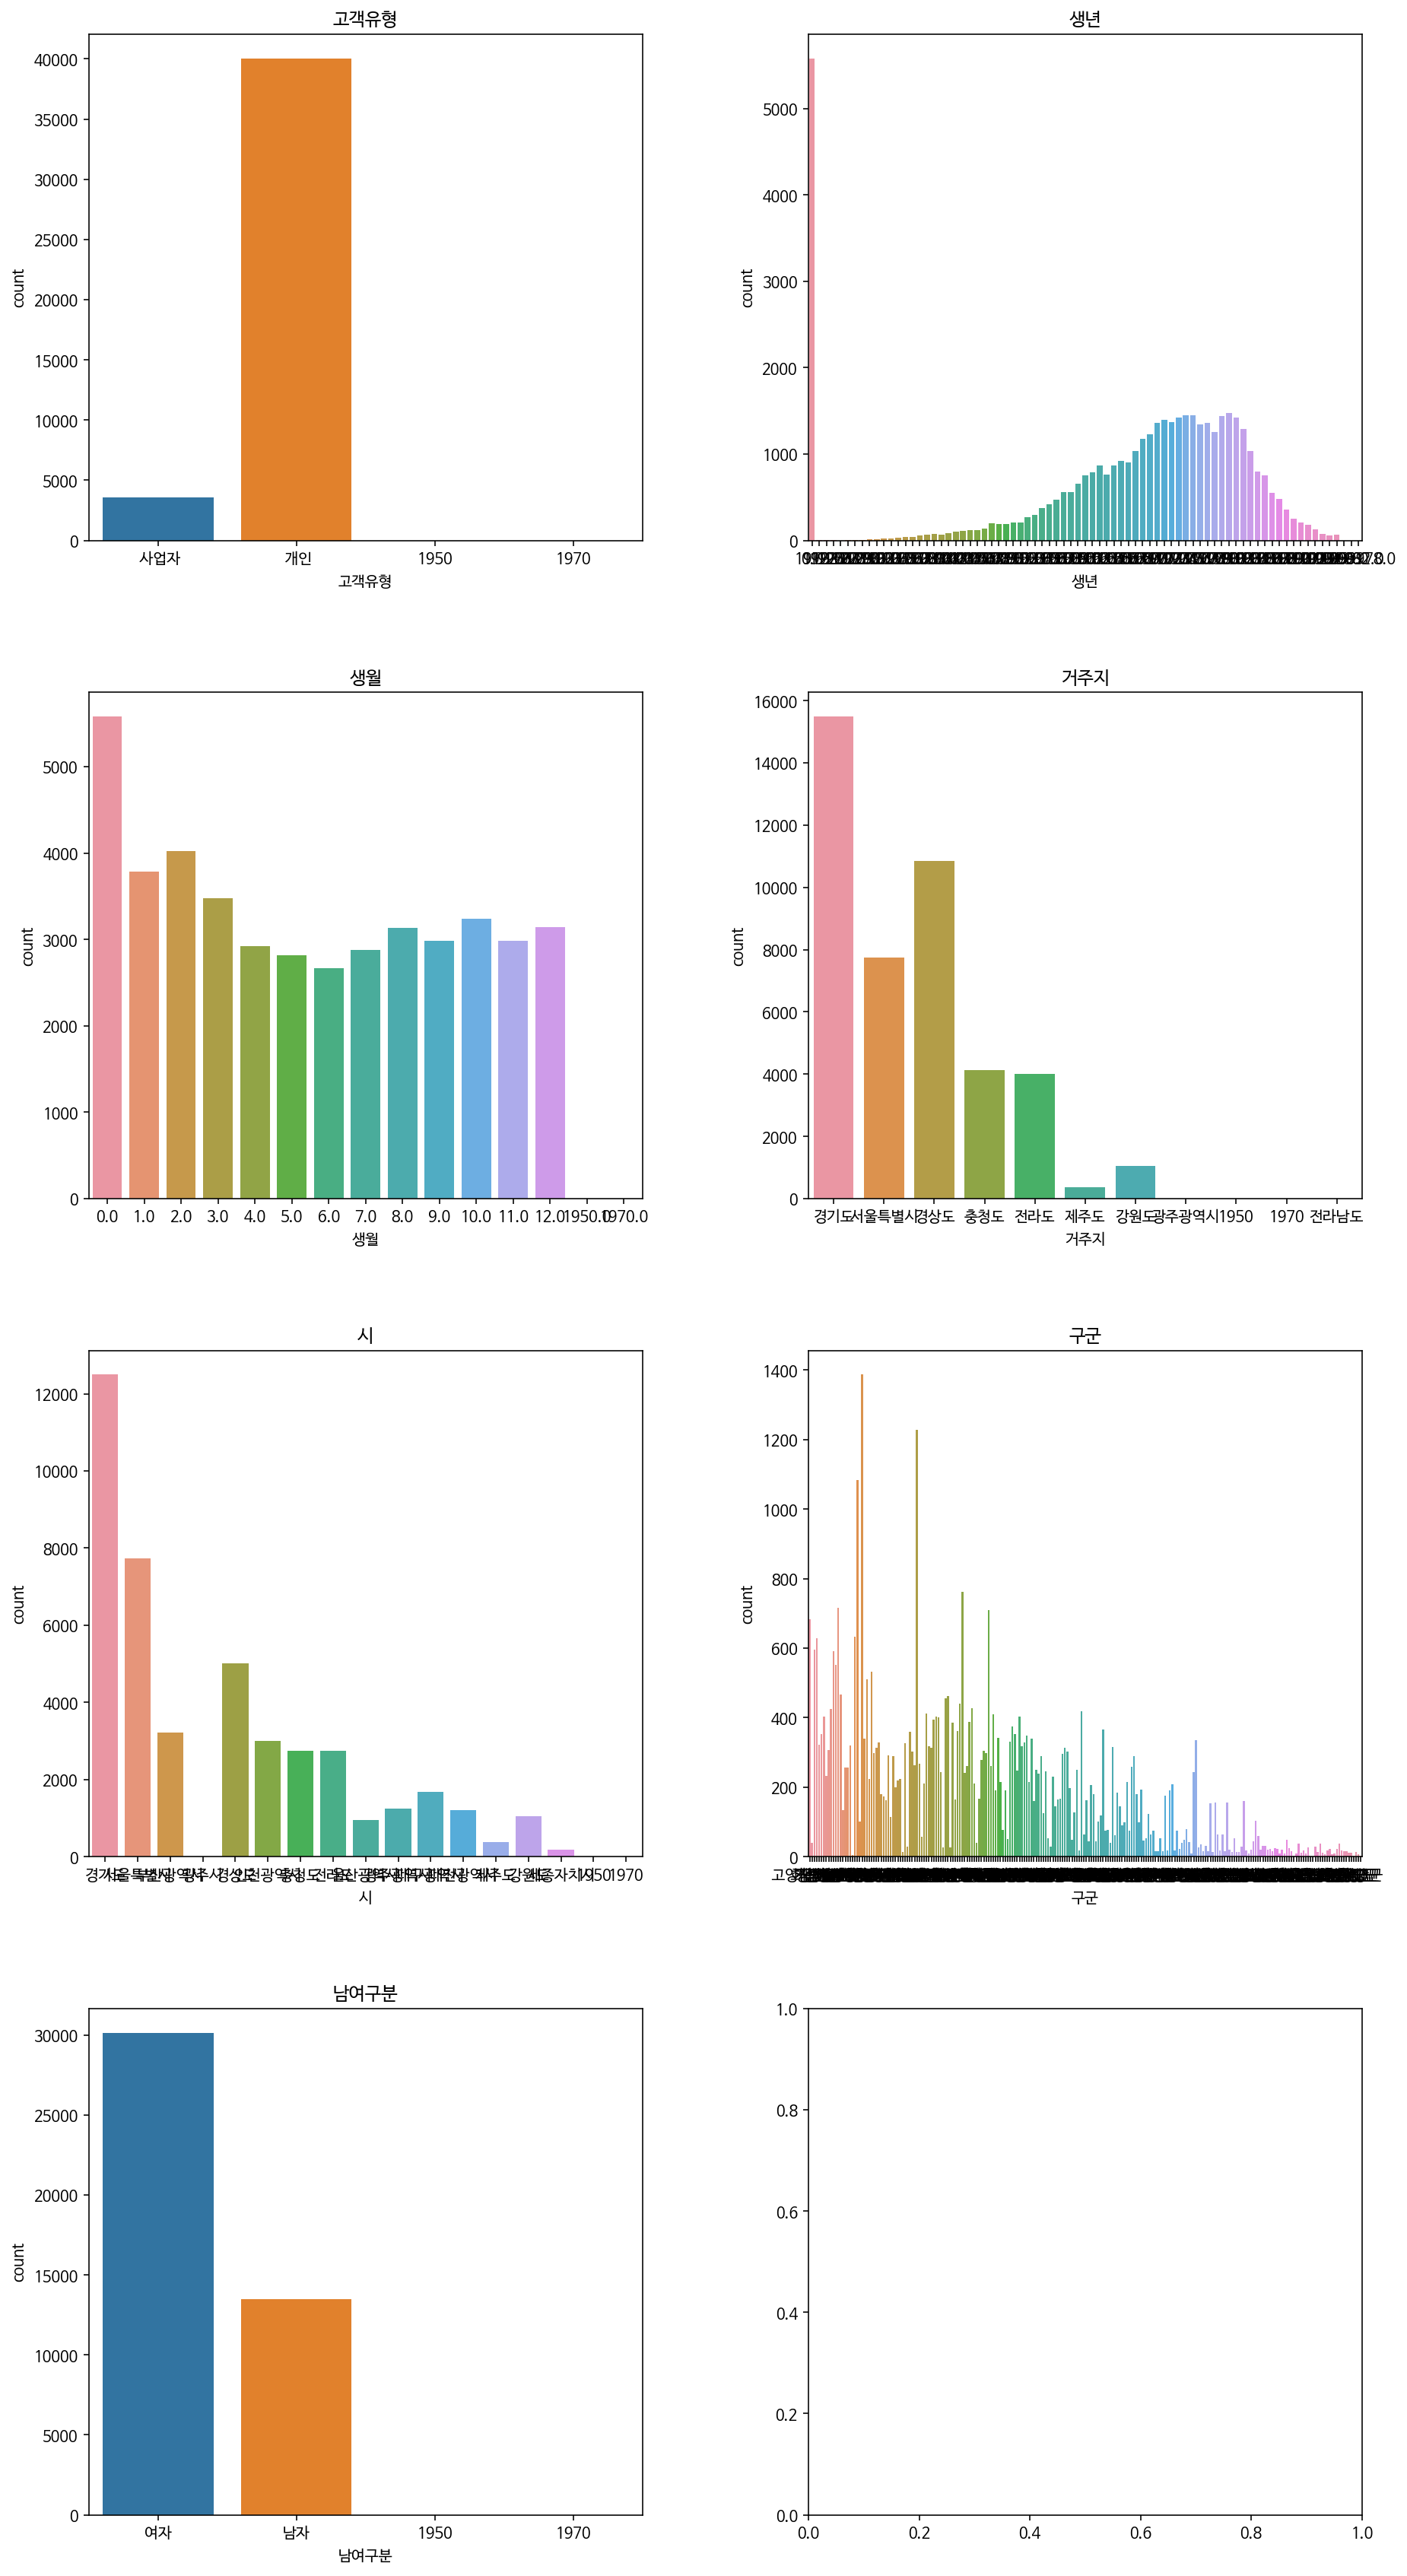

In [17]:

figure,ax = plt.subplots(nrows=4,ncols=2)
figure.set_size_inches(15,30)
figure.subplots_adjust(hspace=0.3,wspace=0.3)
cols = b_p.columns.drop('고객ID')
cols
ind=0;
for i in range(4):
    for j in range(2):
        if (i == 3 and j == 1):break
        ax[i][j].set_title("{}".format(cols[ind]))
        sns.countplot(b_p["{}".format(cols[ind])], ax = ax[i][j])
        ind += 1

### 고객유형은 개인이 월등히 많으며, 여자 고객이 많다. 생년과 생월에선 결측치가 많고 거주지부터 구군까지 세밀하게 나눠지며, 경기도 서울순의 사용지역 경향을 확인할수 있다. 직관적으로 경향을 확인할수 있는 거주지만 사용할 예정이다. 생월은 결측치를 제외하곤 균일하게 분산되 있는것으로 확인되며, 생년도 균일하지만 년도가 높아질수록 낮아 지는 경향을 보인다. 생월은 제거할 예정이다.

## Cleaned Business & Personal

In [18]:
cleaned_BP = b_p.drop(['생월','시','구군','생년'],axis=1,inplace=False)
cleaned_BP.head()

,고객ID,고객유형,거주지,남여구분,나이
0,25702131,사업자,경기도,여자,0.0
1,25742841,사업자,경기도,여자,100.0
2,25742683,사업자,서울특별시,여자,100.0
3,25851817,사업자,서울특별시,여자,0.0
4,25742687,사업자,서울특별시,여자,100.0


## ETC (Data Set_3)

In [19]:
plt.figure(figsize=(30,20))
#etc_d.info()
print(etc_d.columns)
## 중복 존재함
#etc_d['고객ID'].value_counts()
#etc_d["계약기간"].max()
#print(etc_d['신용등급'].unique().sort())

#etc_d['신용등급'].unique().info()
# 신용 결측치 존재 및 이상치 존재

#credit = sorted(etc_d['신용등급'].unique())
#print(credit)

#계약유형에 결측치하나 존재
#etc_d['연체건수'].unique()

Index(['고객ID', '판매유형', '계약유형', '유통경로', '계약일', '계약기간', '납부유형', '제품군', '월랜탈비용',
       '계약상태', '연체건수', '연체여부', '신용등급', '결제은행', '해약여부'],
      dtype='object')


<Figure size 2160x1440 with 0 Axes>

### 판매유형, 계약유형, 제품군, 연체여부, 신용등급, 결제은행, 해약여부에 결측지가 존재하는것으로 보인다. 연체건수, 월랜탈비는 이상치가 존재하는것으로 판단된다.

## 판매유형

In [20]:
print(etc_d['판매유형'].unique())
etc_d[etc_d[['판매유형']].isnull().any(axis=1)]

['렌탈' '멤버십' nan]


,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
111,66299293,NaN,교체렌탈,서비스 방문,10-21-2014,60,CMS,DES-1,96900,계약확정,0,없음,2.0,농협회원조합,정상
332,66758867,NaN,일반,홈쇼핑/방송,10-21-2014,60,카드이체,DES-1,96900,계약확정,0,없음,1.0,삼성카드,정상
51302,66579515,NaN,프로모션,R관리방판,02-03-2015,60,무통장,DES-3A,96900,계약확정,0,없음,NaN,롯데카드,정상
51305,66792778,NaN,일반,렌탈총판,02-03-2015,60,카드이체,DES-1,96900,계약확정,0,없음,2.0,신한카드,정상


#### 위의 4고객이 다른설명변수들이 다 같을때 판매유형이 무엇이 많았는지 찾아 보겠다. 또한 계약유형과 판매유형의 관계가 있어보인다 확인해보겠다.

In [21]:
etc_d["계약유형"].groupby([etc_d["판매유형"]]).value_counts()

판매유형  계약유형  
렌탈    프로모션      15812
      일반        15322
      통합 패키지    10185
      교체렌탈      4974 
      단체        190  
멤버십   멤버십S      2627 
      멤버십B      2087 
      멥버십C      92   
      멤버십A      13   
Name: 계약유형, dtype: int64

#### 맴버쉽의 계약유형은 전부 맴버쉽이였고, 기타는 렌탈이였다. 위의 결측치는 '렌탈'일 가능성이 가장 높다.

In [22]:
etc_d[(etc_d["신용등급"] == 2) & (etc_d["제품군"] == "DES-1") & 
      (etc_d["계약유형"]=="교체렌탈") & (etc_d["유통경로"] == "서비스 방문") 
      & (etc_d["납부유형"] == "CMS") & (etc_d["결제은행"] == "농협회원조합")
     & (etc_d["계약상태"] == "계약확정")& (etc_d["월랜탈비용"] == 96900)].head(3)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
111,66299293,NaN,교체렌탈,서비스 방문,10-21-2014,60,CMS,DES-1,96900,계약확정,0,없음,2.0,농협회원조합,정상
919,66423651,렌탈,교체렌탈,서비스 방문,10-22-2014,60,CMS,DES-1,96900,계약확정,0,없음,2.0,농협회원조합,정상
2127,66255627,렌탈,교체렌탈,서비스 방문,10-23-2014,60,CMS,DES-1,96900,계약확정,0,없음,2.0,농협회원조합,정상


#### 고객ID 66299293의 판매유형은 같은 조건일때의 렌탈이 압도적이 였다. 결과적으로 렌탈일 가능성이 가장 높다.

In [23]:
etc_d[(etc_d["신용등급"] == 1) & (etc_d["제품군"] == "DES-1") & 
      (etc_d["계약유형"]=="일반") & (etc_d["유통경로"] == "홈쇼핑/방송") 
      & (etc_d["납부유형"] == "카드이체") & (etc_d["결제은행"] == "삼성카드")
     & (etc_d["계약상태"] == "계약확정")& (etc_d["월랜탈비용"] == 96900)].head(3)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
332,66758867,NaN,일반,홈쇼핑/방송,10-21-2014,60,카드이체,DES-1,96900,계약확정,0,없음,1.0,삼성카드,정상
2113,66758982,렌탈,일반,홈쇼핑/방송,10-23-2014,60,카드이체,DES-1,96900,계약확정,0,없음,1.0,삼성카드,정상
2731,66758834,렌탈,일반,홈쇼핑/방송,10-24-2014,60,카드이체,DES-1,96900,계약확정,0,없음,1.0,삼성카드,정상


#### 고객ID 66758867의 판매유형은 렌탈일 가능성이 가장 높다.

In [24]:
etc_d[(etc_d["제품군"] == "DES-3A") & 
      (etc_d["계약유형"]=="프로모션")& (etc_d["월랜탈비용"] == 96900)
      & (etc_d["유통경로"] == "R관리방판") 
     & (etc_d["계약상태"] == "계약확정")].head(3)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
39238,66789353,렌탈,프로모션,R관리방판,01-10-2015,60,CMS,DES-3A,96900,계약확정,0,없음,7.0,국민은행,정상
39562,66571322,렌탈,프로모션,R관리방판,01-12-2015,60,카드이체,DES-3A,96900,계약확정,0,없음,5.0,국민카드,정상
39593,66790485,렌탈,프로모션,R관리방판,01-12-2015,60,CMS,DES-3A,96900,계약확정,0,없음,5.0,국민은행,정상


#### 고객ID 66792778의 판매유형은 렌탈일 가능성이 가장 높다.

#### 전부 렌탈로 대체할 것이다.

In [25]:
etc_d.loc[etc_d[['판매유형']].isnull().any(axis=1),'판매유형'] = '렌탈'

## 계약유형

In [26]:
etc_d["계약유형"].unique()

array(['일반', '교체렌탈', '멤버십S', '프로모션', '통합 패키지', nan, '멤버십A', '멥버십C', '단체',
       '멤버십B'], dtype=object)

#### 결측치를 자세히 살펴 보겠다.

In [27]:
etc_d[etc_d[["계약유형"]].isnull().any(axis=1)]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
139,66758649,렌탈,NaN,홈쇼핑/방송,10-21-2014,60,CMS,DES-2,81900,계약확정,0,없음,2.0,농협회원조합,정상


#### 고객ID 66758649가 계약유형이 존재하지 않는데 같은 조건의 다른 고객들을 살펴 보겠다.

In [28]:
etc_d[(etc_d["신용등급"] == 2) & (etc_d["제품군"] == "DES-2") & 
      (etc_d["계약기간"]==60) & (etc_d["유통경로"] == "홈쇼핑/방송") 
      & (etc_d["납부유형"] == "CMS") & (etc_d["결제은행"] == "농협회원조합")& (etc_d["월랜탈비용"] == 81900)].head(3)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
137,66758643,렌탈,통합 패키지,홈쇼핑/방송,10-21-2014,60,CMS,DES-2,81900,계약확정,0,없음,2.0,농협회원조합,정상
139,66758649,렌탈,NaN,홈쇼핑/방송,10-21-2014,60,CMS,DES-2,81900,계약확정,0,없음,2.0,농협회원조합,정상
1626,66759177,렌탈,통합 패키지,홈쇼핑/방송,10-23-2014,60,CMS,DES-2,81900,계약확정,0,없음,2.0,농협회원조합,정상


#### 고객ID 66758649의 계약유형은 통합 패키지일가능성이 가장 높게 보인다. 통합 패키지로 대체하겠다.

In [29]:
etc_d.loc[etc_d[["계약유형"]].isnull().any(axis=1), '계약유형'] = '통합 패키지'

## 제품군

In [30]:
etc_d[etc_d[['제품군']].isnull().any(axis=1)]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
277,66758695,렌탈,일반,홈쇼핑/방송,10-21-2014,60,CMS,NaN,96900,계약확정,0,없음,2.0,부산은행,정상


In [31]:
etc_d[(etc_d["신용등급"] == 2) &  (etc_d["계약유형"]=='일반') &
      (etc_d["계약기간"]==60) & (etc_d["유통경로"] == "홈쇼핑/방송") 
      & (etc_d["납부유형"] == "CMS") & (etc_d["결제은행"] == "부산은행")
      & (etc_d["월랜탈비용"] == 96900)].head(3)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
277,66758695,렌탈,일반,홈쇼핑/방송,10-21-2014,60,CMS,NaN,96900,계약확정,0,없음,2.0,부산은행,정상
14801,66767825,렌탈,일반,홈쇼핑/방송,11-15-2014,60,CMS,DES-1,96900,계약확정,0,없음,2.0,부산은행,정상
15357,66768838,렌탈,일반,홈쇼핑/방송,11-17-2014,60,CMS,DES-1,96900,계약확정,0,없음,2.0,부산은행,정상


#### 고객ID 66758695의 제품군은 DES-1일 확률이 가장 높을것으로 판단된다. 같은 조건에서의 많은 고객이 DES-1을 택하였다.

In [32]:
etc_d.loc[etc_d[['제품군']].isnull().any(axis=1),'제품군'] = 'DES-1'

## 연체여부

In [33]:
etc_d[etc_d[['연체여부']].isnull().any(axis=1)]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
182,66758715,렌탈,프로모션,전자랜드,10-21-2014,60,카드이체,DES-1,145200,계약확정,2,NaN,7.0,롯데카드,정상
255,66758519,렌탈,프로모션,서비스 방문,10-21-2014,60,카드이체,DES-2,90900,계약확정,0,NaN,1.0,롯데카드,정상


#### 먼저 고객ID 66758715의 경우 연체건수가 존재한다. 연체는 '있음'으로 판단된다.(연체건수가 잘못 기입됬을 확율 존재함) 반대로 고객ID 66758519의 경우 연체건수가 존재하지 않는다. 연체는 '없음'으로 판단된다.

In [34]:
etc_d.loc[182,'연체여부'] = '있음'
etc_d.loc[255,'연체여부'] = '없음'

## 신용등급

In [35]:
etc_d['신용등급'].unique()         ###############결측치와0등급 존재

array([ 9.,  2.,  8.,  5.,  1.,  7.,  4., nan,  3.,  6., 10.,  0.])

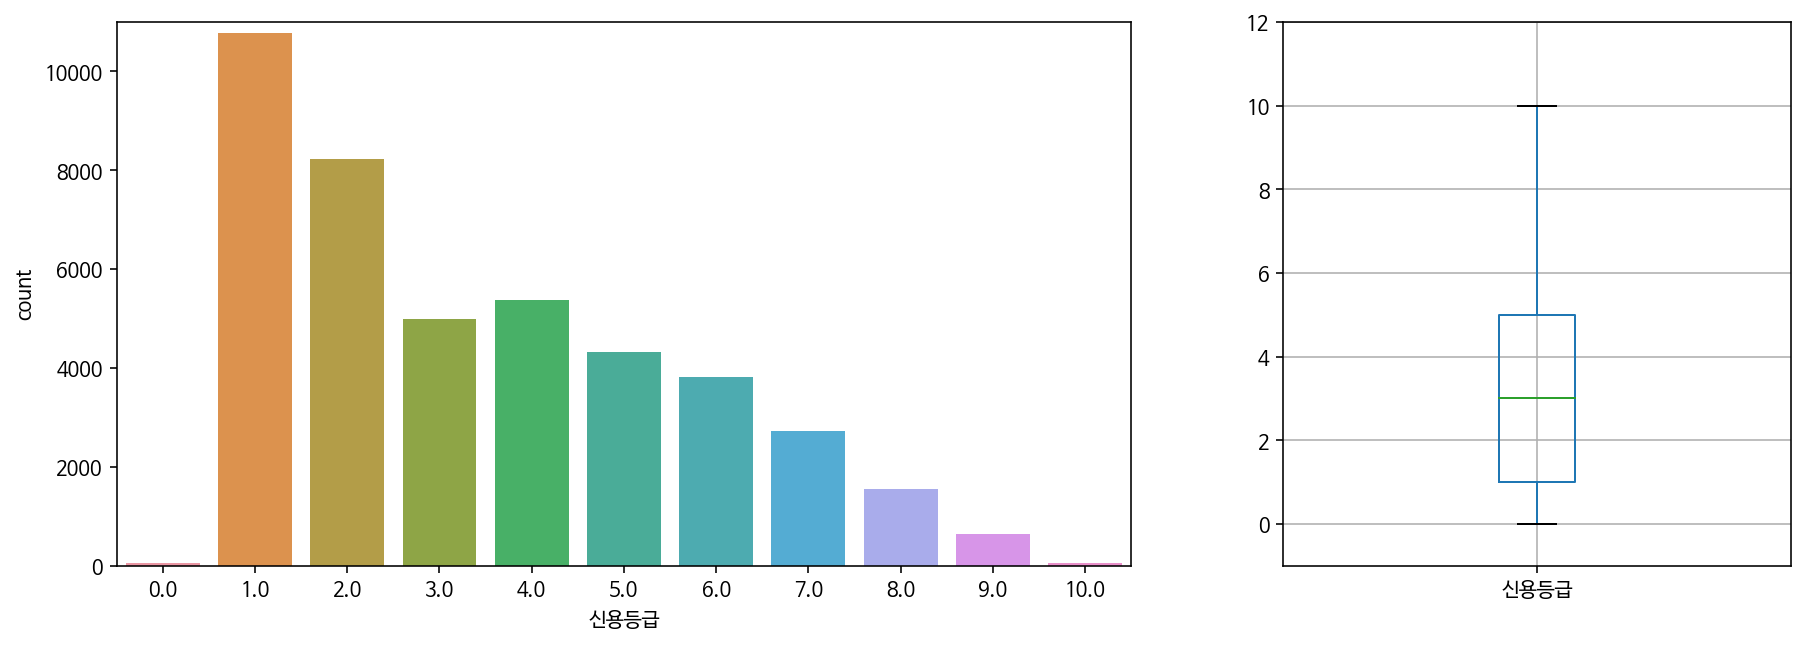

In [36]:
### before 신용등급
figure, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,gridspec_kw={'width_ratios':[4,2]})
figure.set_size_inches(15,5)

ax1.set_ylim(0,11000)
ax2.set_ylim(-1,12)

sns.countplot(etc_d["신용등급"],ax=ax1)
etc_d[["신용등급"]].boxplot(ax=ax2)

#### 결측치도 0으로 할당하겠다.

In [37]:
etc_d.loc[(etc_d["신용등급"]==0) | (etc_d['신용등급'].isnull()),'신용등급'] = 0

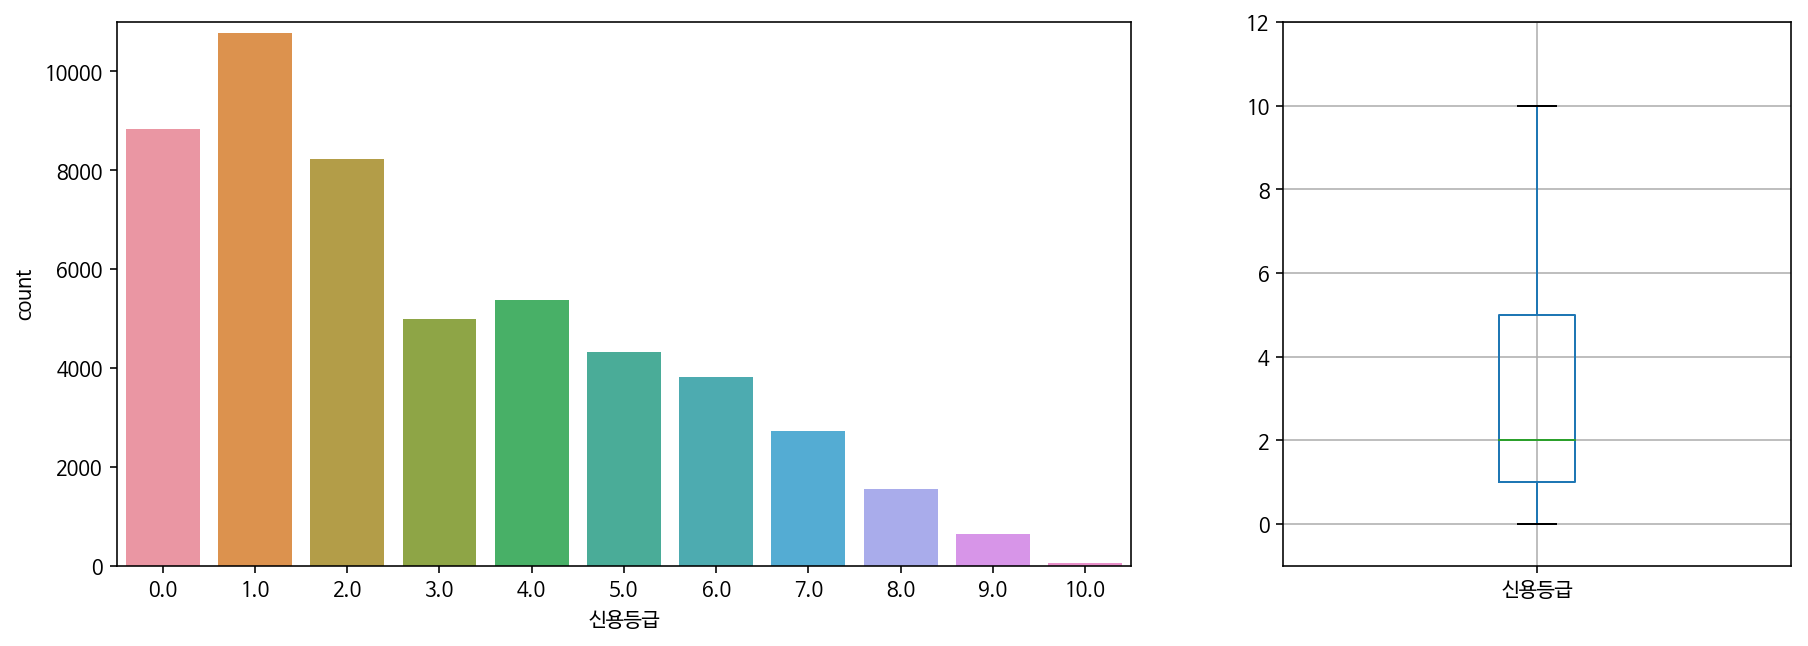

In [38]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,gridspec_kw={'width_ratios':[4,2]})
figure.set_size_inches(15,5)

ax1.set_ylim(0,11000)
ax2.set_ylim(-1,12)

sns.countplot(etc_d["신용등급"],ax=ax1)
etc_d[["신용등급"]].boxplot(ax=ax2)

#### 신용등급이 0쪽으로 좀더 치우쳤는데 0은 결측치와 이상치임으로 처리 !!!!!!!!!!!!!

## 결제은행 (파생변수 생성 '금융권','세부금융')

In [39]:
etc_d[etc_d[['결제은행']].isnull().any(axis=1)].count()
#etc_d['결제은행'].unique() ############

고객ID     2760
판매유형     2760
계약유형     2760
유통경로     2760
계약일      2760
계약기간     2760
납부유형     2760
제품군      2760
월랜탈비용    2760
계약상태     2760
연체건수     2760
연체여부     2760
신용등급     2760
결제은행     0   
해약여부     2760
dtype: int64

In [40]:
#### 제1금융권 - 은행
#우리은행, 신한은행,국민은행,부산은행,농협중앙회,전북은행,수협중앙회,제주은행,산업은행,
#### 제2금융권 - 저축은행, 보험회사,증권회사,상호금융기관 
#새마을금고,
#### 제3금융권 - 대부업체들

#### 결측치가 존재하는데 알수없음 으로 대체하겠다.

In [41]:
etc_d.loc[(etc_d[['결제은행']].isnull().any(axis=1)),'결제은행'] = '결측'

In [42]:
col1 = etc_d['결제은행'].unique()
type(col1)

numpy.ndarray

In [43]:
'''비기너
credit1 = ((etc_d['결제은행'] == "우리은행") |(etc_d['결제은행'] == "농협중앙회") |
           (etc_d['결제은행'] == "부산은행") |(etc_d['결제은행'] == "하나은행") |
           (etc_d['결제은행'] == "전북은행") |(etc_d['결제은행'] == "기업은행") |
(etc_d['결제은행'] == "신한은행") |(etc_d['결제은행'] == "국민은행") |(etc_d['결제은행'] == "SC제일은행")|
(etc_d['결제은행'] == "대구은행") |(etc_d['결제은행'] == "광주은행") |(etc_d['결제은행'] == "외환은행") |
(etc_d['결제은행'] == "씨티은행") |(etc_d['결제은행'] == "신협중앙회") |(etc_d['결제은행'] == "경남은행") |
(etc_d['결제은행'] == "수협중앙회") |(etc_d['결제은행'] == "산업은행")  |(etc_d['결제은행'] == "우체국")|
(etc_d['결제은행'] == "제주은행") )
credit2 = ((etc_d['결제은행'] == "농협회원조합")|(etc_d['결제은행'] == "산림조합중앙회")|
           (etc_d['결제은행'] == "새마을금고")|(etc_d['결제은행'] == "현대카드")|
           (etc_d['결제은행'] == "국민카드")|(etc_d['결제은행'] == "롯데카드")|
           (etc_d['결제은행'] == "신한카드")|(etc_d['결제은행'] == "삼성카드")|
           (etc_d['결제은행'] == "BC카드")|(etc_d['결제은행'] == "미래에셋증권")|
           (etc_d['결제은행'] == "외환카드")|(etc_d['결제은행'] == "유안타증권")|
           (etc_d['결제은행'] == "상호저축은행")|(etc_d['결제은행'] == "대신증권")|
           (etc_d['결제은행'] == "현대증권")|(etc_d['결제은행'] == "삼성증권")|
           (etc_d['결제은행'] == "하나대투증권")|(etc_d['결제은행'] == "SK증권")|
           (etc_d['결제은행'] == "수협카드")|(etc_d['결제은행'] == "한국투자증권")|
           (etc_d['결제은행'] == "신한금융투자")|(etc_d['결제은행'] == "하나SK")|
           (etc_d['결제은행'] == "NH농협카드")|(etc_d['결제은행'] == "메리츠종합금융증권")|
           (etc_d['결제은행'] == "하이투자증권")|(etc_d['결제은행'] == "우리카드")|
           (etc_d['결제은행'] == "대우증권")|(etc_d['결제은행'] == "씨티카드"))
etc_d.loc[credit1,'금융권'] = 1
etc_d.loc[credit2,'금융권'] = 2
etc_d.loc[etc_d['결제은행']=='알수없음','금융권'] = 0
etc_d.head(3)
'''

'비기너\ncredit1 = ((etc_d[\'결제은행\'] == "우리은행") |(etc_d[\'결제은행\'] == "농협중앙회") |\n           (etc_d[\'결제은행\'] == "부산은행") |(etc_d[\'결제은행\'] == "하나은행") |\n           (etc_d[\'결제은행\'] == "전북은행") |(etc_d[\'결제은행\'] == "기업은행") |\n(etc_d[\'결제은행\'] == "신한은행") |(etc_d[\'결제은행\'] == "국민은행") |(etc_d[\'결제은행\'] == "SC제일은행")|\n(etc_d[\'결제은행\'] == "대구은행") |(etc_d[\'결제은행\'] == "광주은행") |(etc_d[\'결제은행\'] == "외환은행") |\n(etc_d[\'결제은행\'] == "씨티은행") |(etc_d[\'결제은행\'] == "신협중앙회") |(etc_d[\'결제은행\'] == "경남은행") |\n(etc_d[\'결제은행\'] == "수협중앙회") |(etc_d[\'결제은행\'] == "산업은행")  |(etc_d[\'결제은행\'] == "우체국")|\n(etc_d[\'결제은행\'] == "제주은행") )\ncredit2 = ((etc_d[\'결제은행\'] == "농협회원조합")|(etc_d[\'결제은행\'] == "산림조합중앙회")|\n           (etc_d[\'결제은행\'] == "새마을금고")|(etc_d[\'결제은행\'] == "현대카드")|\n           (etc_d[\'결제은행\'] == "국민카드")|(etc_d[\'결제은행\'] == "롯데카드")|\n           (etc_d[\'결제은행\'] == "신한카드")|(etc_d[\'결제은행\'] == "삼성카드")|\n           (etc_d[\'결제은행\'] == "BC카드")|(etc_d[\'결제은행\'] == "미래에셋증권")|\n           (etc_d[\'결제은행\'] == "외환카드")

In [44]:
m0=[]
for x in etc_d["결제은행"]:
    x = str(x)
    if '조합' in x:
        m0.append(2)
    elif '증권' in x:
        m0.append(2)
    elif '금고' in x:
        m0.append(2)
    elif '저축' in x:
        m0.append(2)
    elif '투자' in x:
        m0.append(2)
    elif '중앙회' in x:
        m0.append(1)
    elif '은행' in x:
        m0.append(1)
    elif '우체국' in x:
        m0.append(1)
    elif '결측' in x:
        m0.append(0)
    else: m0.append(2)
etc_d['금융권'] = m0

In [45]:
etc_d.isnull().sum()

고객ID     0 
판매유형     0 
계약유형     0 
유통경로     0 
계약일      0 
계약기간     0 
납부유형     0 
제품군      0 
월랜탈비용    0 
계약상태     0 
연체건수     0 
연체여부     0 
신용등급     0 
결제은행     0 
해약여부     25
금융권      0 
dtype: int64

#### 파생변수 '금융권'을 만들었지만, 1 과 2금융권으로 크게 나눠 졌는데 조금더 세밀히 분류해 보겠다.
### 은행,중앙회,조합(금고),카드,증권으로 나눠 보겠다.

In [46]:
m1=[]
for x in etc_d["결제은행"]:
    x = str(x)
    if '조합' in x:
        m1.append('조합(금고)')
    elif '금고' in x:
        m1.append('조합(금고)')
    elif '증권' in x:
        m1.append('증권')
    elif '중앙회' in x:
        m1.append('중앙회')
    elif '은행' in x:
        m1.append('은행')
    elif '우체국' in x:
        m1.append('은행')
    elif '카드' in x:
        m1.append('카드')
    else: m1.append('결측')
etc_d['세부금융권'] = m1

In [47]:
etc_d.head(3)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권
0,66758234,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,9.0,새마을금고,정상,2,조합(금고)
1,66755948,렌탈,교체렌탈,서비스 방문,10-20-2014,60,카드이체,DES-1,102900,계약확정,0,없음,2.0,현대카드,정상,2,카드
2,66756657,렌탈,일반,홈쇼핑/방송,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,8.0,우리은행,정상,1,은행


## 해약여부

In [48]:
etc_d[etc_d[['해약여부']].isnull().any(axis=1)].head(3)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권
1416,66424060,멤버십,멤버십S,렌탈재계약,10-22-2014,12,CMS,DES-2,55200,계약확정,0,없음,2.0,국민은행,NaN,1,은행
2276,66798182,멤버십,멤버십S,렌탈재계약,10-24-2014,12,CMS,DES-1,66900,계약확정,0,없음,3.0,농협중앙회,NaN,1,중앙회
2561,66423580,멤버십,멤버십S,렌탈재계약,10-24-2014,12,카드이체,DES-1,66900,계약확정,0,없음,0.0,신한카드,NaN,2,카드


#### 계약확정이 해약여부와 관련이 있어보이며 계약확정, 기간만료일 경우 정상, 해약확정일 경우 해약이라고 판단된다.

In [49]:
etc_d[(etc_d["계약상태"] == '계약확정')].head(3)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권
0,66758234,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,9.0,새마을금고,정상,2,조합(금고)
1,66755948,렌탈,교체렌탈,서비스 방문,10-20-2014,60,카드이체,DES-1,102900,계약확정,0,없음,2.0,현대카드,정상,2,카드
2,66756657,렌탈,일반,홈쇼핑/방송,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,8.0,우리은행,정상,1,은행


#### 정상으로 해약여부를 처리하겠다.

In [50]:
etc_d.loc[(etc_d["계약상태"] == '계약확정')&etc_d[['해약여부']].isnull().any(axis=1), '해약여부'] = '정상'

#### 해약확정

In [51]:
etc_d[(etc_d["계약상태"] == '해약확정') & etc_d[['해약여부']].isnull().any(axis=1)].head(3)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권


#### 기간만료

In [52]:
etc_d[(etc_d["계약상태"] == '기간만료') & etc_d[['해약여부']].isnull().any(axis=1)].head(3)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권
19041,66430981,멤버십,멤버십S,렌탈재계약,11-23-2014,12,CMS,DES-1,66900,기간만료,9,있음,6.0,국민은행,NaN,1,은행


In [53]:
etc_d.loc[(etc_d["계약상태"] == '기간만료') & etc_d[['해약여부']].isnull().any(axis=1), '해약여부'] = '정상'

## 계약기간

In [54]:
etc_d[(etc_d["계약기간"] >= 600)]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권
16,66190995,렌탈,프로모션,홈쇼핑/방송,10-20-2014,600000,카드이체,DES-1,96900,계약확정,0,없음,1.0,롯데카드,정상,2,카드
25,66755833,렌탈,통합 패키지,전자랜드,10-20-2014,600,CMS,DES-2,89400,계약확정,0,없음,7.0,우체국,정상,1,은행


#### 계약기간에 보면 600개월과 600000개월이 존재하는데 이상치라고 판단되며, 60을 잘못썻을수도 있다고 생각된다. 600이상의 자료들을 살펴보자

In [55]:
etc_d[(etc_d["월랜탈비용"] == 96900) & (etc_d["제품군"] == "DES-1")].head(5)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권
0,66758234,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,9.0,새마을금고,정상,2,조합(금고)
2,66756657,렌탈,일반,홈쇼핑/방송,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,8.0,우리은행,정상,1,은행
13,66757861,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,1.0,농협중앙회,정상,1,중앙회
16,66190995,렌탈,프로모션,홈쇼핑/방송,10-20-2014,600000,카드이체,DES-1,96900,계약확정,0,없음,1.0,롯데카드,정상,2,카드
22,66758074,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,1.0,농협중앙회,정상,1,중앙회


In [56]:
etc_d[(etc_d["월랜탈비용"] == 89400) & (etc_d["제품군"] == "DES-2")].head(5)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권
25,66755833,렌탈,통합 패키지,전자랜드,10-20-2014,600,CMS,DES-2,89400,계약확정,0,없음,7.0,우체국,정상,1,은행
141,66757909,렌탈,통합 패키지,서비스 방문,10-21-2014,60,CMS,DES-2,89400,계약확정,4,있음,4.0,신한은행,정상,1,은행
189,66758580,렌탈,통합 패키지,서비스 방문,10-21-2014,60,CMS,DES-2,89400,계약확정,0,없음,2.0,농협중앙회,정상,1,중앙회
211,66758567,렌탈,통합 패키지,서비스 방문,10-21-2014,60,CMS,DES-2,89400,계약확정,0,없음,2.0,농협회원조합,정상,2,조합(금고)
219,66757037,렌탈,통합 패키지,서비스 방문,10-21-2014,60,CMS,DES-2,89400,계약확정,0,없음,1.0,우리은행,정상,1,은행


#### 다수의 고객이 위와 같이 같은 제품을 렌탈했으면 같은 비용을 가졌다. 같은 조건의 고객들은 다 60의 계약기간을 가졌다. 계약기간 600 이상은 60이 잘못 입력된것으로 보인다.

In [57]:
etc_d.loc[(etc_d["계약기간"] >= 600),'계약기간'] = 60

## 월랜탈비용

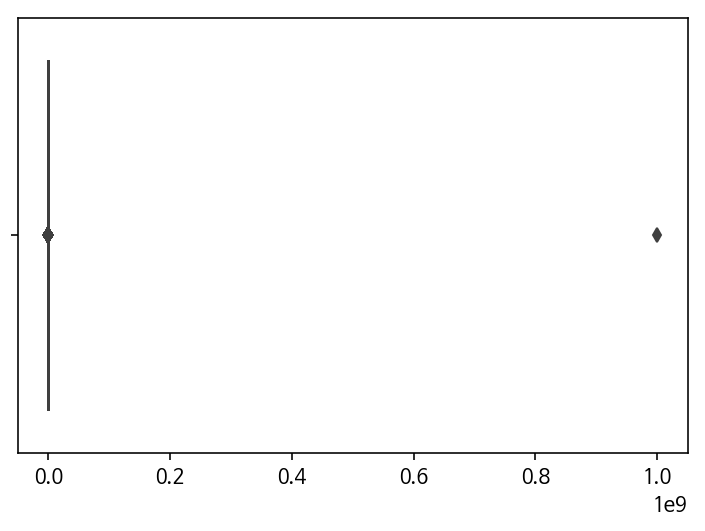

In [58]:
sns.boxplot([etc_d["월랜탈비용"]])

In [59]:
etc_d["월랜탈비용"].describe()

count    5.130700e+04
mean     1.134836e+05
std      4.414418e+06
min      5.460300e+04
25%      8.190000e+04
50%      9.690000e+04
75%      9.840000e+04
max      1.000000e+09
Name: 월랜탈비용, dtype: float64

In [60]:
98400+(((etc_d["월랜탈비용"].quantile(.75))-(etc_d["월랜탈비용"].quantile(0.25)))*8)

230400.0

#### 8*IQR이상부터 이상치라고 판단.

In [61]:
etc_d[etc_d["월랜탈비용"] >= 230400]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권
17,66757035,렌탈,프로모션,하이마트,10-20-2014,60,CMS,DES-1,999999999,계약확정,0,없음,4.0,부산은행,정상,1,은행


#### 같은 조건의 고객을 찾아보겠다.

In [62]:
etc_d[(etc_d["신용등급"] == 4) & (etc_d["제품군"] == "DES-1") & 
      (etc_d["계약유형"]=="프로모션") & (etc_d["유통경로"] == "하이마트") 
      & (etc_d["납부유형"] == "CMS") & (etc_d["결제은행"] == "부산은행")]

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권
17,66757035,렌탈,프로모션,하이마트,10-20-2014,60,CMS,DES-1,999999999,계약확정,0,없음,4.0,부산은행,정상,1,은행
15527,66646371,렌탈,프로모션,하이마트,11-17-2014,60,CMS,DES-1,96900,계약확정,0,없음,4.0,부산은행,정상,1,은행
46317,66795459,렌탈,프로모션,하이마트,01-23-2015,60,CMS,DES-1,96900,계약확정,0,없음,4.0,부산은행,정상,1,은행


#### 같은 신용등급, 제품, 계약유형, 유통경로, 납부유형, 결제은행일경우 월랜탈비용은 96900원이였는데, 999999999은 96900원일 확률이 높을것으로 판단되어 96900으로 대체 하겠다.

In [63]:
etc_d.loc[17,'월랜탈비용'] = 96900

## 연체건수

In [64]:
etc_d[(etc_d['연체건수'] == -1)].head(3)

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권
1792,66760179,렌탈,프로모션,홈쇼핑/방송,10-23-2014,60,카드이체,DES-1,96900,계약확정,-1,없음,1.0,롯데카드,정상,2,카드
1798,66674030,렌탈,프로모션,서비스 방문,10-23-2014,60,CMS,DES-2,90900,계약확정,-1,없음,1.0,신한은행,정상,1,은행
1819,66759728,렌탈,일반,영업방판,10-23-2014,60,CMS,DES-1,87900,계약확정,-1,없음,0.0,국민은행,정상,1,은행


#### 연체건수는 연체여부랑 관련이있으며, 연체여부가 없음이면 전부 0이라고 판단된다.

In [65]:
etc_d.loc[(etc_d['연체건수'] == -1) & (etc_d['연체여부'] == '없음'),'연체건수'] = 0

## 파생변수 (경로)

#### 유통경유의 종류가 다양한데 비슷한 성향의 경로들을 grouping할 예정이다. 티비, 인터넷등의 경로는 '온라인'으로 하이마트, 홈플러스등은 '오프라인'으로 법인관련은 '법인'

In [84]:
etc_d['유통경로'].unique()

array(['서비스 방문', '홈쇼핑/방송', '렌탈재계약', '하이마트', '렌탈총판', '전자랜드', '홈플러스', '일반',
       '영업방판', '이마트', '홈쇼핑/인터넷', 'R빌리미', 'R유통사', 'R인터넷', 'R관리방판',
       'R농협인터넷몰', 'R농협', 'R법인', 'R렌탈운영', 'R법인그룹'], dtype=object)

In [102]:
## r빌리미,r인터넷,(개인도 존재함),
mix_d[(mix_d['유통경로']=='R법인그룹')&(mix_d['고객유형']=='개인')]

,고객ID,고객유형,거주지,남여구분,나이,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권


In [66]:
etc_d.describe()

,고객ID,계약기간,월랜탈비용,연체건수,신용등급,금융권
count,5.130700e+04,51307.000000,51307.000000,51307.000000,51307.000000,51307.000000
mean,6.266479e+07,55.638782,93995.003703,0.161362,2.841951,1.399185
std,1.216083e+07,12.009812,15304.724053,1.122128,2.393628,0.589433
min,2.568798e+07,12.000000,54603.000000,0.000000,0.000000,0.000000
25%,6.643149e+07,60.000000,81900.000000,0.000000,1.000000,1.000000
50%,6.676578e+07,60.000000,96900.000000,0.000000,2.000000,1.000000
75%,6.678161e+07,60.000000,98400.000000,0.000000,5.000000,2.000000
max,6.696986e+07,60.000000,215700.000000,15.000000,10.000000,2.000000


In [67]:
etc_d.head()

,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권
0,66758234,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,9.0,새마을금고,정상,2,조합(금고)
1,66755948,렌탈,교체렌탈,서비스 방문,10-20-2014,60,카드이체,DES-1,102900,계약확정,0,없음,2.0,현대카드,정상,2,카드
2,66756657,렌탈,일반,홈쇼핑/방송,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,8.0,우리은행,정상,1,은행
3,66423450,멤버십,멤버십S,렌탈재계약,10-20-2014,12,CMS,DES-1,66900,계약확정,0,없음,5.0,농협회원조합,정상,2,조합(금고)
4,66423204,멤버십,멤버십S,렌탈재계약,10-20-2014,12,CMS,DES-1,66900,해약확정,12,있음,8.0,농협회원조합,해약,2,조합(금고)


## DATA GATHERING (Mixture of Data1_Data2_Data3)

In [68]:
mix_d = pd.merge(cleaned_BP, etc_d, on = "고객ID")
mix_d.reset_index(drop=True)
print(mix_d.info())
mix_d[mix_d[['판매유형']].isnull().any(axis=1)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51303 entries, 0 to 51302
Data columns (total 21 columns):
고객ID     51303 non-null int64
고객유형     51303 non-null object
거주지      51303 non-null object
남여구분     51303 non-null object
나이       51303 non-null float64
판매유형     51303 non-null object
계약유형     51303 non-null object
유통경로     51303 non-null object
계약일      51303 non-null object
계약기간     51303 non-null int64
납부유형     51303 non-null object
제품군      51303 non-null object
월랜탈비용    51303 non-null int64
계약상태     51303 non-null object
연체건수     51303 non-null int64
연체여부     51303 non-null object
신용등급     51303 non-null float64
결제은행     51303 non-null object
해약여부     51303 non-null object
금융권      51303 non-null int64
세부금융권    51303 non-null object
dtypes: float64(2), int64(5), object(14)
memory usage: 8.6+ MB
None


,고객ID,고객유형,거주지,남여구분,나이,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,금융권,세부금융권


## bar plot

Index(['판매유형', '계약유형', '유통경로', '계약기간', '납부유형', '제품군', '월랜탈비용', '계약상태', '연체여부',
       '신용등급', '결제은행', '해약여부', '금융권', '세부금융권'],
      dtype='object')


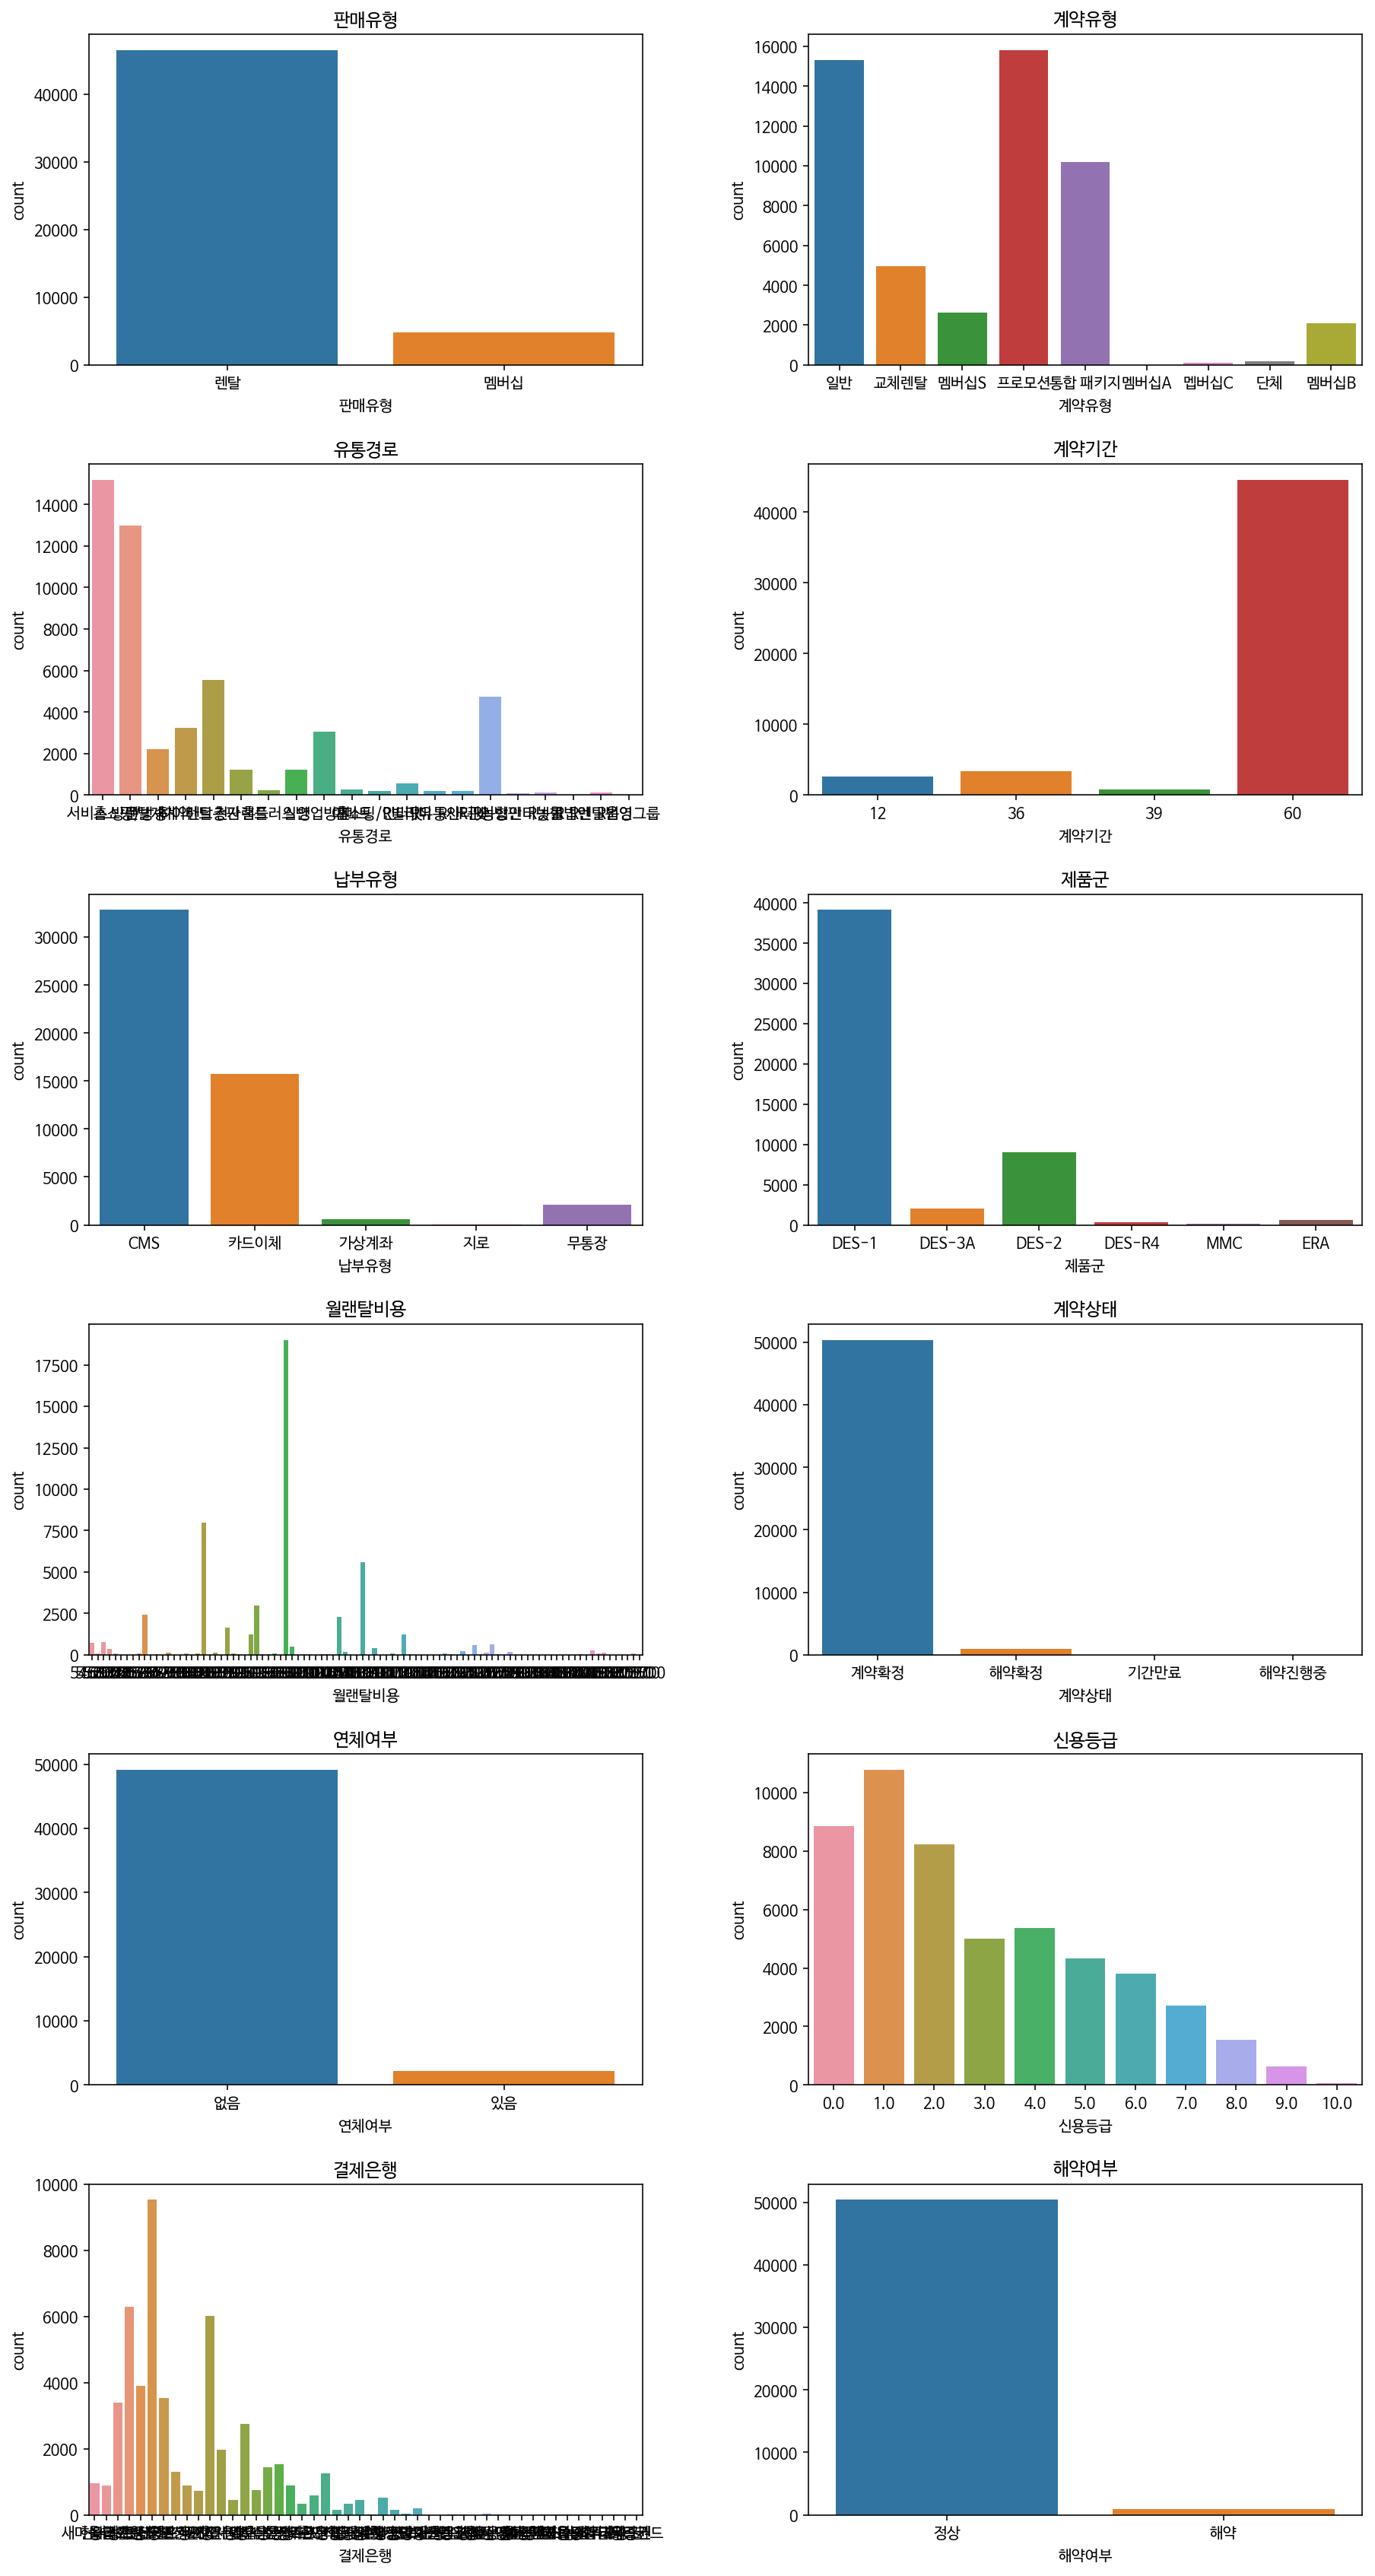

In [75]:
figure,ax = plt.subplots(nrows=6,ncols=2)
figure.set_size_inches(15,30)
figure.subplots_adjust(hspace=0.3,wspace=0.3)
index = etc_d.columns
index = index.drop(["고객ID","계약일","연체건수"])
print(index)

ind=0;
for i in range(6):
    for j in range(2):
        #plt.figure(figsize=(15,10))
        #plt.plot()
        #if((i == 5) & (j == 1)): break;
        ax[i][j].set_title("{}".format(index[ind]))
        sns.countplot(etc_d["{}".format(index[ind])], ax = ax[i][j])
        #ax[i][j].set_xlabel(rotation = 90)
        #ax[i][j].set_xticklabels(rotation=90)
        ind += 1
#plt.show()

# RandomForest Modeling

### 모델링에서 고객ID, 계약기간, 연체건수, 결제은행, 금융권, 계약일,계약유형은 판매유형이 있기 때문에 필요하지 않을것으로 보인다. 

In [80]:
mix_d1 = mix_d.drop(["고객ID","계약기간","연체건수","결제은행","금융권","계약일","계약상태","계약유형"],axis=1,inplace=False)

## Dummy Creating

In [81]:
# get_dummies: 데이터의 문자형 컬럼에 대한 더미변수 생성 
mix_dummy = pd.get_dummies(mix_d1.drop(["해약여부"],axis=1,inplace=False))
# 더미변수 생성된 데이터의 상위 5개row를 확인
mix_dummy.head()

,나이,월랜탈비용,신용등급,고객유형_ 개인,고객유형_ 사업자,거주지_강원도,거주지_경기도,거주지_경상도,거주지_광주광역시,거주지_서울특별시,거주지_전라남도,거주지_전라도,거주지_제주도,거주지_충청도,남여구분_남자,남여구분_여자,판매유형_렌탈,판매유형_멤버십,유통경로_R관리방판,유통경로_R농협,유통경로_R농협인터넷몰,유통경로_R렌탈운영,유통경로_R법인,유통경로_R법인그룹,유통경로_R빌리미,유통경로_R유통사,유통경로_R인터넷,유통경로_렌탈재계약,유통경로_렌탈총판,유통경로_서비스 방문,유통경로_영업방판,유통경로_이마트,유통경로_일반,유통경로_전자랜드,유통경로_하이마트,유통경로_홈쇼핑/방송,유통경로_홈쇼핑/인터넷,유통경로_홈플러스,납부유형_CMS,납부유형_가상계좌,납부유형_무통장,납부유형_지로,납부유형_카드이체,제품군_DES-1,제품군_DES-2,제품군_DES-3A,제품군_DES-R4,제품군_ERA,제품군_MMC,연체여부_없음,연체여부_있음,세부금융권_결측,세부금융권_은행,세부금융권_조합(금고),세부금융권_중앙회,세부금융권_증권,세부금융권_카드
0,0.0,66900,0.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,100.0,142200,0.0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,100.0,102900,0.0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,100.0,102900,0.0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,0.0,96600,0.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


## Data Split 7:3

In [82]:
df_y = mix_d["해약여부"]
df_x = mix_dummy
X_train, X_test, Y_train, Y_test = train_test_split(df_x,df_y,test_size = 0.3, random_state=1234)
print("train data X size : {}".format(X_train.shape))
print("train data Y size : {}".format(Y_train.shape))
print("test data X size : {}".format(X_test.shape))
print("test data Y size : {}".format(Y_test.shape))

train data X size : (35912, 57)
train data Y size : (35912,)
test data X size : (15391, 57)
test data Y size : (15391,)


In [83]:
rf_uncustomized = RandomForestClassifier(random_state=123)
rf_uncustomized.fit(X_train,Y_train)
# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(rf_uncustomized.score(X_train, Y_train)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(rf_uncustomized.score(X_test, Y_test)))

Accucary on training set: 0.989
Accucary on test set: 0.983


### Importance

In [73]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = X_train.columns
ds_feature_importance["Importance"] = rf_uncustomized.feature_importances_
# ds_feature_importance의 테이블을 중요도별로 정렬
#ds_feature_importance.sort_values("Importance", ascending=False).round(3)

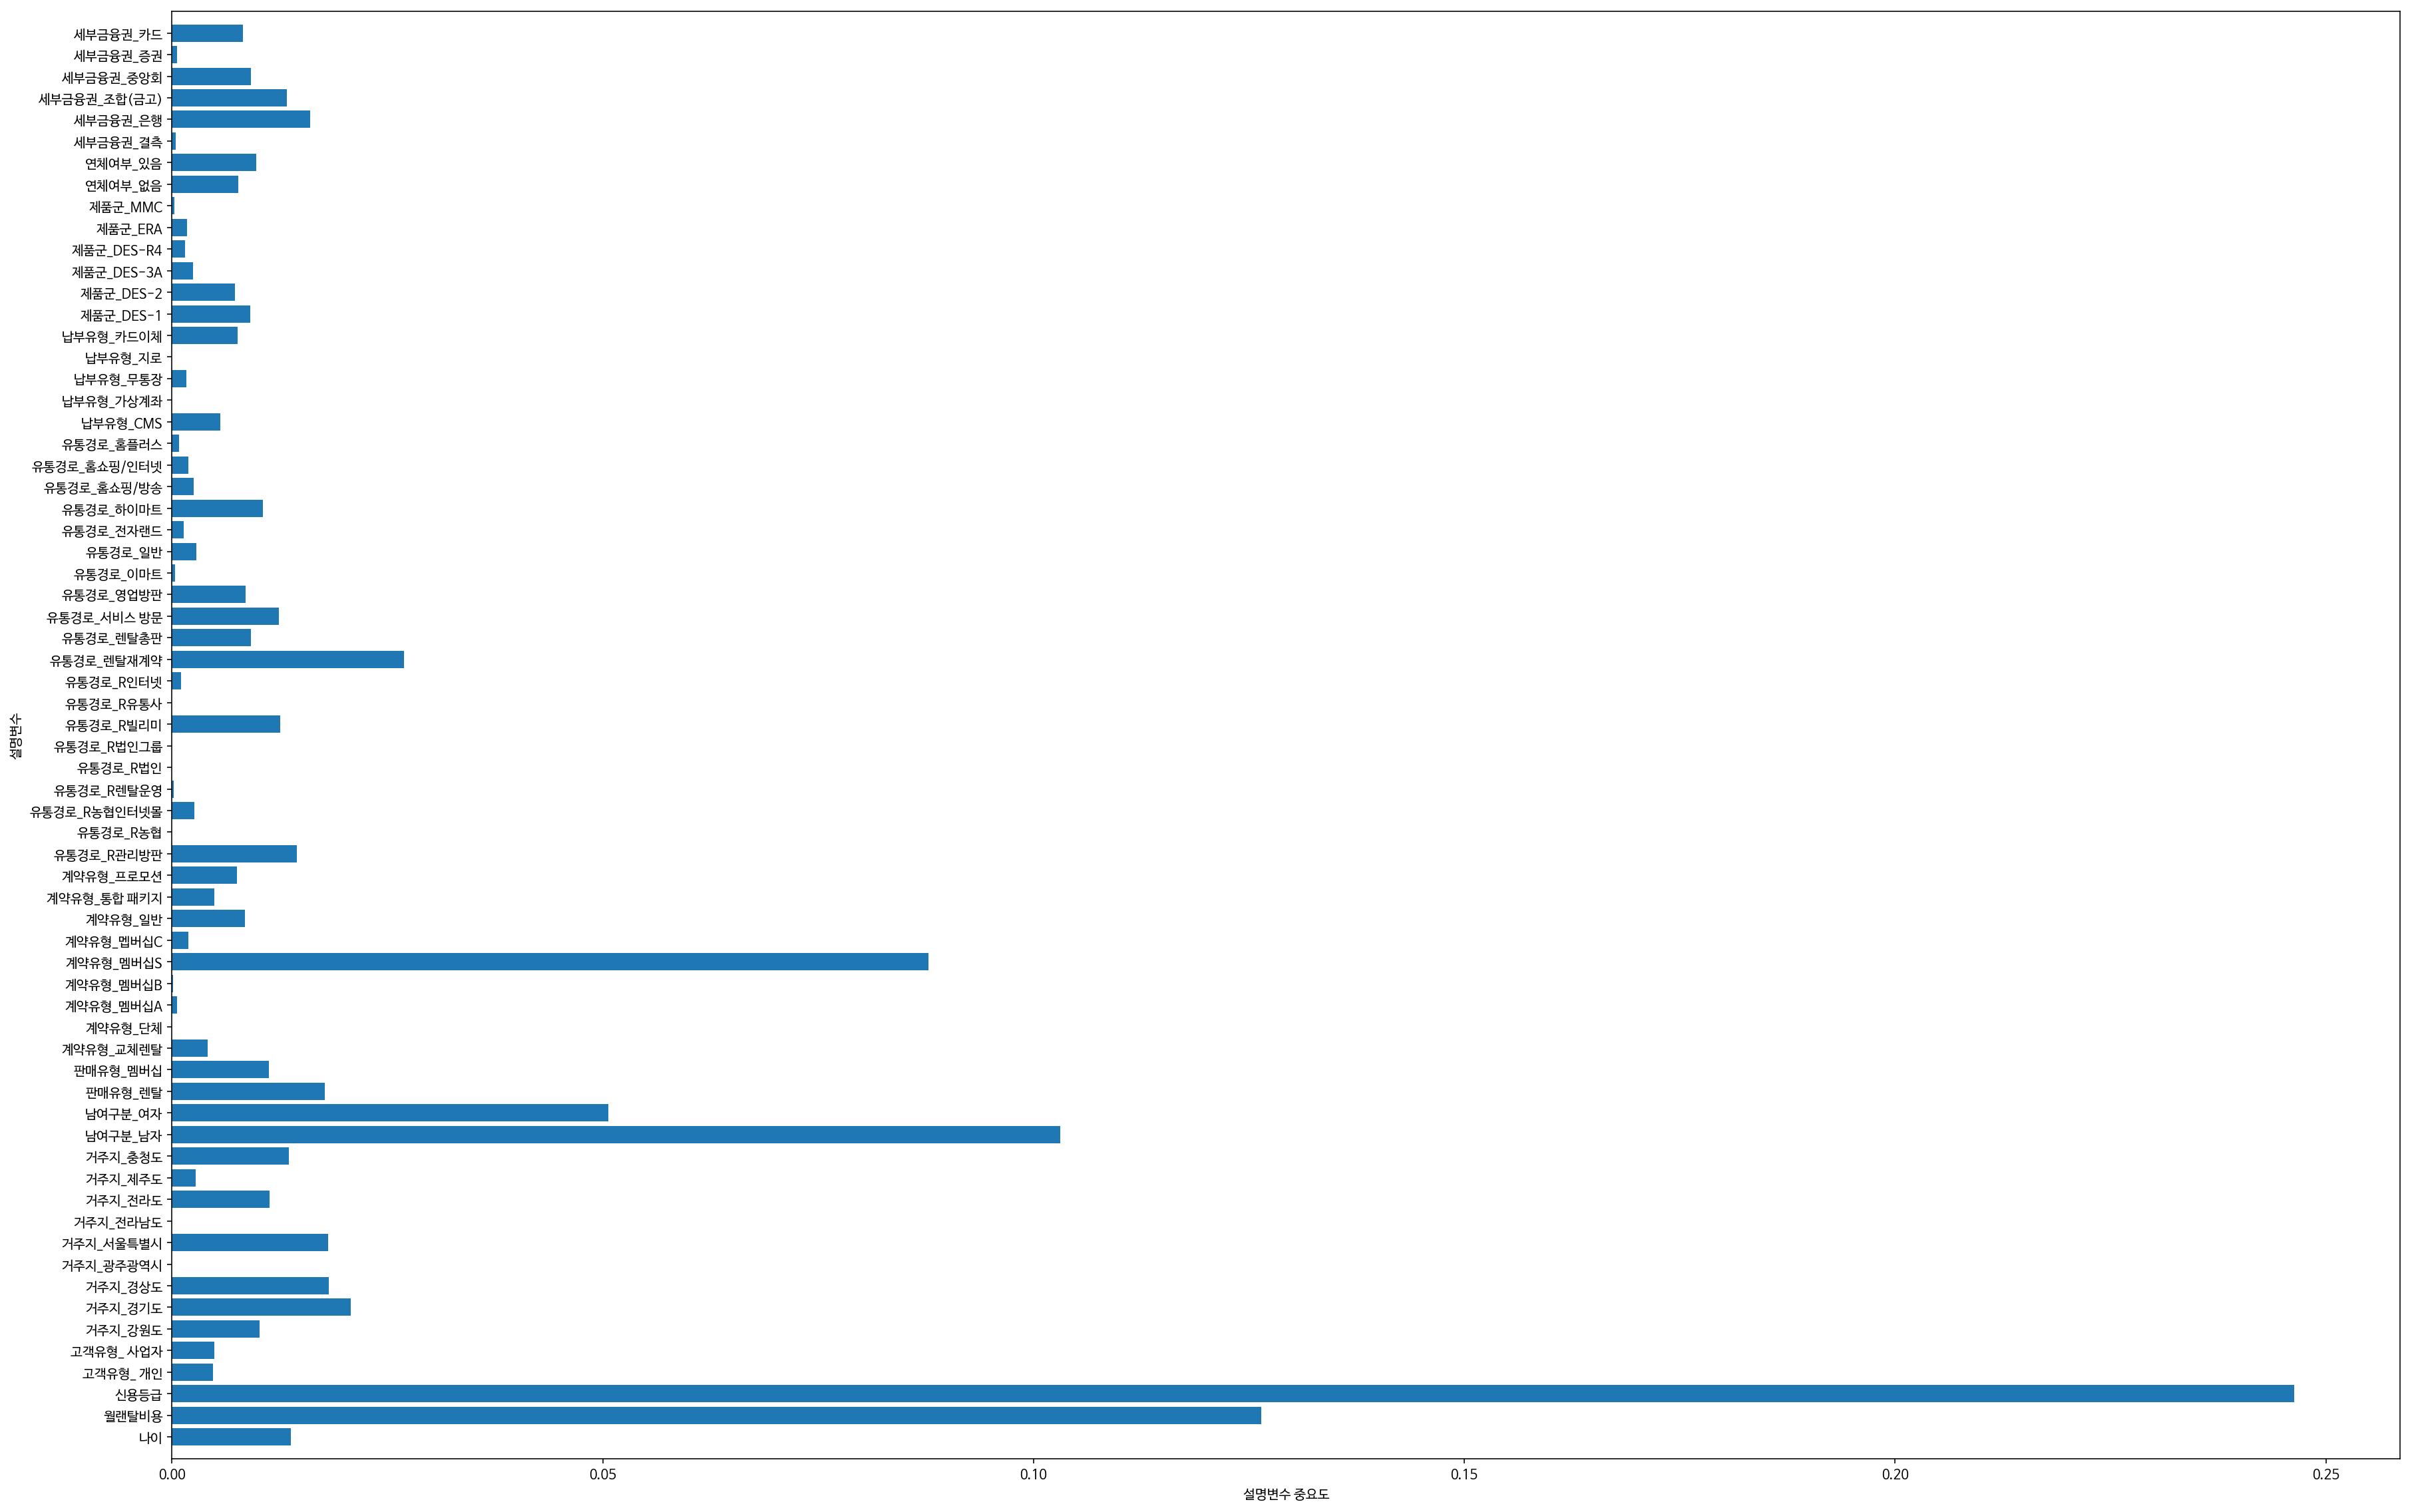

In [74]:
# plot size
plt.figure(figsize=(30,20))
# 설명변수 중요도 그래프 함수 정의
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)

# 설명변수 중요도 그래프 함수 실행
plot_feature_importances(rf_uncustomized)